Source code: "https://realpython.com/python-keras-text-classification/#choosing-a-data-set"

In [30]:
import pandas as pd

In [31]:
filepath_dict = {
    "yelp": "data/yelp_labelled.txt",
    "amazon": "data/amazon_cells_labelled.txt",
    "imdb": "data/imdb_labelled.txt",
}

In [32]:
df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source
    df_list.append(df)

In [37]:
df = pd.concat(df_list)

In [40]:
from sklearn.model_selection import train_test_split

df_yelp = df[df['source'] == 'yelp']
sentences, labels = df_yelp['sentence'].values, df_yelp['label'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25, random_state=1000)

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)



(1, 2505)


In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.796


In [44]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [76]:
input_dim = X_train.shape[1]

In [77]:
model = Sequential([
    Dense(10, input_dim=input_dim, activation='relu', name="L1"),
    Dense(1, activation='sigmoid', name="L2"),
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 10)                25060     
                                                                 
 L2 (Dense)                  (None, 1)                 11        
                                                                 
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [78]:
history = model.fit(X_train, y_train, epochs=100, verbose=True, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/100
57/57 [==============================] - 1s 4ms/step - loss: 0.6902 - accuracy: 0.5455 - val_loss: 0.6895 - val_accuracy: 0.5722
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.8217 - val_loss: 0.6850 - val_accuracy: 0.6684
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.8824 - val_loss: 0.6509 - val_accuracy: 0.7166
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.9323 - val_loss: 0.6390 - val_accuracy: 0.7487
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.9519 - val_loss: 0.5697 - val_accuracy: 0.7754
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.9661 - val_loss: 0.5463 - val_accuracy: 0.7701
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.9750 - val_loss: 0.5261 - val_accuracy: 0.7914
Epoch 8/100
5

Epoch 59/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.7802 - val_accuracy: 0.7861
Epoch 60/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.7818 - val_accuracy: 0.7861
Epoch 61/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.7909 - val_accuracy: 0.7861
Epoch 62/100
57/57 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.7951 - val_accuracy: 0.7861
Epoch 63/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.8003 - val_accuracy: 0.7861
Epoch 64/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.7974 - val_accuracy: 0.7861
Epoch 65/100
57/57 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.8044 - val_accuracy: 0.7861
Epoch 

In [80]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 1.0000


In [81]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.7861


In [84]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

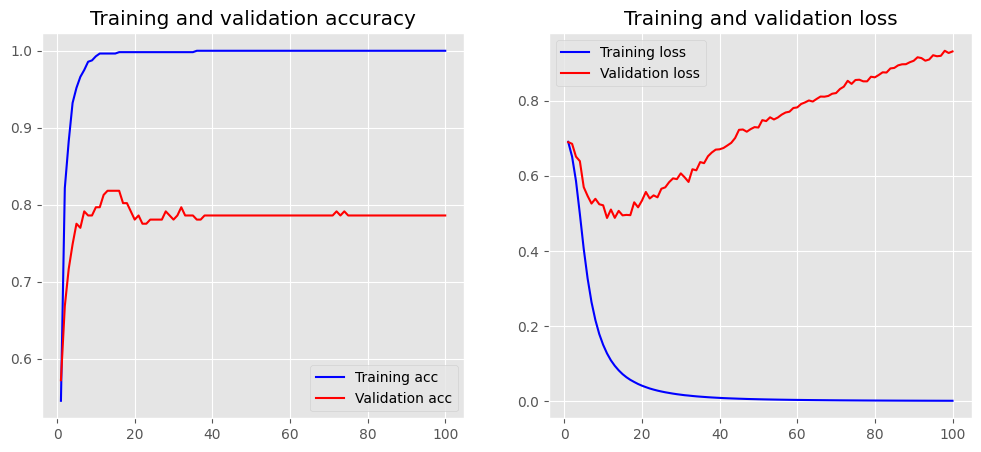

In [85]:
plot_history(history)

In [99]:
test_phrases = ['It was a horrible day', 'what a waste of time', 'incredible', 'wish that was made better', 'very4 cool and helpful']
inp = vectorizer.transform(test_phrases)

In [100]:
model.predict(inp)

1/1 [==============================] - 0s 17ms/step


array([[1.3486870e-01],
       [6.6924875e-04],
       [4.3464431e-01],
       [6.8986643e-05],
       [9.9825627e-01]], dtype=float32)

## Using word embeddings

In [111]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import data_utils

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1

In [112]:
print(sentences_train[2])
print(X_train[2])

I am a fan of his ... This movie sucked really bad.  
[7, 150, 2, 932, 4, 49, 6, 11, 563, 45, 30]


In [115]:
maxlen = 100
X_train = data_utils.pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = data_utils.pad_sequences(X_test, padding='post', maxlen=maxlen)

In [121]:
from keras.models import Sequential
from keras import layers

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=50, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 50)           128750    
                                                                 
 flatten_4 (Flatten)         (None, 5000)              0         
                                                                 
 dense_25 (Dense)            (None, 10)                50010     
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.6738


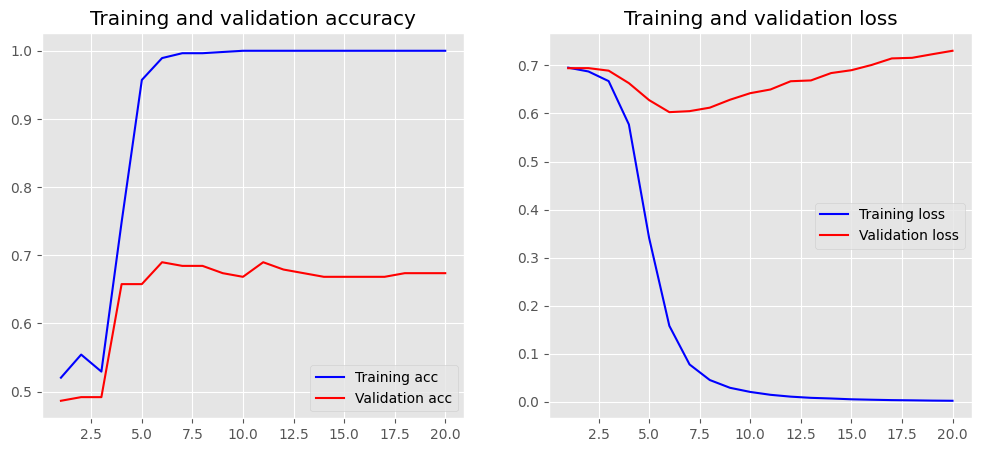

In [122]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)